# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

The hospitality industry, driven by customer-centric services and dynamic market demands, relies heavily on data to improve efficiency and customer satisfaction. In this project titled Hotel Booking Analysis, we aim to uncover valuable insights from a rich dataset comprising hotel reservation details collected by Booking.com. The dataset encompasses multiple facets of booking behavior such as reservation status, cancellation patterns, room preferences, special requests, booking channels, customer demographics, and lead times. This allows a holistic understanding of the booking process and highlights areas for strategic improvement.

Booking.com, a global leader in hotel and accommodation reservations, operates in a highly competitive environment where customer expectations, operational efficiency, and dynamic pricing play crucial roles in business success. This analysis investigates how guests interact with booking systems—examining trends such as whether early bookings are more likely to be canceled, which customer segments make special requests, or how different channels (corporate, online travel agencies, direct bookings) impact booking behavior.

The dataset includes variables such as the type of hotel (Resort vs. City), lead time (the gap between reservation and arrival), booking changes, customer types (e.g., repeated guests, contract customers), assigned vs. reserved rooms, and key attributes like meal plan, room type, and deposit type. It also contains information on whether a booking was canceled, the number of nights stayed, and service-related factors like car parking and special requests.

Through univariate, bivariate, and multivariate analysis, we assess relationships among variables and discover patterns that impact both the customer experience and business outcomes. For instance, we examine whether cancellations are more prevalent among specific customer types or booking channels, and how special requests or deposit policies correlate with no-shows or booking modifications.

The insights from this project will help Booking.com and hotel partners:

Understand customer behavior and preferences.

Predict and reduce cancellations using early indicators.

Optimize pricing and promotion strategies for different segments.

Tailor service offerings to improve satisfaction and retention.

Streamline operations such as room allocation and customer support.

In essence, this project combines data analysis and business strategy to help Booking.com enhance its decision-making in hotel operations. With a data-driven approach, the organization can anticipate market trends, customize guest experiences, and ultimately strengthen its competitive position in the global hospitality industry.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**
<br>"How can Booking.com leverage historical booking data to understand guest behavior, identify factors contributing to cancellations and modifications, and improve booking efficiency and service personalization across hotel types and market segments?"

#### **Define Your Business Objective?**

The primary business objective of this project is to **enhance booking performance and customer satisfaction** by analyzing historical hotel reservation data. Specifically, the goals include:

- **Understand Cancellation Drivers**  
  Identify the key features that influence booking cancellations (e.g., lead time, deposit type, customer type).

- **Improve Booking Efficiency**  
  Analyze booking behavior to optimize operational processes like room allocation, agent handling, and parking needs.

- **Segment Customers Effectively**  
  Group customers based on preferences, booking patterns, and behaviors to enable targeted marketing and service personalization.

- **Predict High-Risk Bookings**  
  Build a foundation for predictive modeling that can flag bookings likely to be canceled or modified, allowing proactive business decisions.

- **Strategic Insights for Revenue Optimization**  
  Use data insights to support decisions on pricing, promotions, and inventory management tailored to market demand and customer profiles.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
pd.set_option('display.max.columns',None)

#!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
Hotel_booking_df = pd.read_csv("Hotel Bookings.csv")

### Dataset First View

In [3]:
Hotel_booking_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
Hotel_booking_df.shape

(119390, 32)

### Dataset Information

In [5]:
# Dataset Info
Hotel_booking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(Hotel_booking_df[Hotel_booking_df.duplicated()])

31994

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
Hotel_booking_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

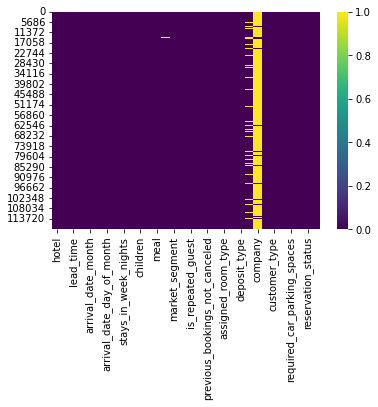

In [8]:
# Visualizing the missing values
sns.heatmap(Hotel_booking_df.isnull(),cbar=True,cmap='viridis')
plt.show()

### What did you know about your dataset?

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

The above dataset has 119390 rows and 32 columns. There are mising values in 3 columns and duplicate values as well in the dataset.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
Hotel_booking_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
# Dataset Describe
Hotel_booking_df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Variables Description 


| Field                       | Description                                                                                  |
|-----------------------------|----------------------------------------------------------------------------------------------|
| Hotel                       | H1= Resort Hotel H2= City Hotel                                                              |
| is_cancelled                | If the booking was cancelled (1) or not (0)                                                  |
| lead_time                   | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date |
| arrival_date_year           | Year of arrival date                                                                         |
| arrival_date_month          | Month of arrival date                                                                        |
| arrival_date_week_number    | Week number for arrival date                                                                 |
| arrival_dat_day             | Day of arrival date                                                                          |
| stays_in_weekend_nights     | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel|
| stays_in_week_nights        | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel     |
| adults                      | Number of adults                                                                             |
| children                    | Number of children                                                                           |
| babies                      | Number of babies                                                                             |
| meal                        | Kind of meal opted for                                                                       |
| country                     | Country code                                                                                 |
| market_segment              | Which segment the customer belongs to                                                        |
| Distribution_channel        | How the customer accessed the stay - corporate booking/Direct/TA.TO                          |
| is_repeated_guest           | Guest coming for the first time or not                                                       |
| previous_cancellation       | Was there a cancellation before                                                              |
| previous_bookings           | Count of previous bookings                                                                   |
| reserved_room_type          | Type of room reserved                                                                        |
| assigned_room_type          | Type of room assigned                                                                        |
| booking_changes             | Count of changes made to booking                                                             |
| deposit_type                | Deposit type                                                                                 |
| agent                       | Booked through agent                                                                         |
| days_in_waiting_list        | Number of days in waiting list                                                               |
| customer_type               | Type of customer                                                                             |
| required_car_parking        | If car parking is required                                                                   |
| total_of_special_req        | Number of additional special requirements                                                    |
| reservation_status          | Reservation of status                                                                        |
| reservation_status_date     | Date of the specific status                                                                  |

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
Hotel_booking_df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

In [13]:
data = Hotel_booking_df.copy()

### Handle missing values

In [14]:
#There are 4 null columns: Although 'agent' and 'company' are numerical columns but according to value count it should be treated as categorical
# For simplicity, let's fill missing numerical values with the mean and categorical values with the mode

categorical_cols = ['agent','company','children','country']

# for col in numerical_cols:
#     data[col].fillna(data[col].mean(), inplace=True)

for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


In [15]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,40.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,40.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,40.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [16]:
# Convert data types if necessary
# Convert 'arrival_date_year', 'arrival_date_month', and 'arrival_date_day' to a single datetime column
data['arrival_date'] = pd.to_datetime(data[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1), errors='coerce')

In [17]:
data[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month','arrival_date']].head()

,arrival_date_year,arrival_date_month,arrival_date_day_of_month,arrival_date
0,2015,July,1,2015-07-01
1,2015,July,1,2015-07-01
2,2015,July,1,2015-07-01
3,2015,July,1,2015-07-01
4,2015,July,1,2015-07-01


In [18]:
# Drop the original date columns as they are now combined
data.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

In [19]:
# Create new features if needed
# For example, total_stays, total_people, and total_booking_days
data['total_stays'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data['total_people'] = data['adults'] + data['children'] + data['babies']
data['total_booking_days'] = data['lead_time'] + data['days_in_waiting_list']

In [20]:
# Display the cleaned dataset
data.head()

,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_stays,total_people,total_booking_days
0,Resort Hotel,0,342,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2.0,342
1,Resort Hotel,0,737,27,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0,2.0,737
2,Resort Hotel,0,7,27,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,9.0,40.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1.0,7
3,Resort Hotel,0,13,27,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,40.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,1,1.0,13
4,Resort Hotel,0,14,27,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,40.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,2,2.0,14


In [21]:
# # Save the cleaned data to a new CSV file
# data.to_csv('cleaned_dataset.csv', index=False)


In [22]:
# Exploratory Data Analysis (EDA)
# 1. Distribution of bookings by hotel type
print(data['hotel'].value_counts())

# 2. Cancellation rate
cancellation_rate = data['is_canceled'].mean() * 100
print(f'Cancellation Rate: {cancellation_rate:.2f}%\n')

# 3. Average lead time
average_lead_time = data['lead_time'].mean()
print(f'Average Lead Time: {average_lead_time:.2f} days\n')

# 4. Total number of bookings by month
bookings_by_month = data['arrival_date'].dt.month.value_counts().sort_index()
print(bookings_by_month)

# 5. Most common market segment
most_common_market_segment = data['market_segment'].value_counts().idxmax()
print(f'Most Common Market Segment: {most_common_market_segment}\n')

# 6. Average number of special requests
average_special_requests = data['total_of_special_requests'].mean()
print(f'Average Number of Special Requests: {average_special_requests:.2f}\n')

# 7. Cancellation rate by deposit type
cancellation_rate_by_deposit = data.groupby('deposit_type')['is_canceled'].mean() * 100
print(cancellation_rate_by_deposit)

# 8. Booking changes
average_booking_changes = data['booking_changes'].mean()
print(f'Average Booking Changes: {average_booking_changes:.2f}\n')

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
Cancellation Rate: 37.04%

Average Lead Time: 104.01 days

1      5929
2      8068
3      9794
4     11089
5     11791
6     10939
7     12661
8     13877
9     10508
10    11160
11     6794
12     6780
Name: arrival_date, dtype: int64
Most Common Market Segment: Online TA

Average Number of Special Requests: 0.57

deposit_type
No Deposit    28.377022
Non Refund    99.362446
Refundable    22.222222
Name: is_canceled, dtype: float64
Average Booking Changes: 0.22



### What all manipulations have you done and insights you found?

## Insights from the Dataset

### Distribution of Bookings by Hotel Type
We can determine which type of hotel (Resort or City) receives more bookings.

### Cancellation Rate
Understanding the percentage of bookings that get cancelled can help in improving customer retention strategies.

### Average Lead Time
Knowing the average lead time can help in forecasting and managing hotel resources more effectively.

### Total Number of Bookings by Month
Identifying peak and off-peak booking periods can aid in marketing and promotional planning.

### Most Common Market Segment
Determining the dominant customer segment can help tailor services and offers to the largest customer base.

### Average Number of Special Requests
Understanding the typical number of special requests can assist in staff training and resource allocation.

### Cancellation Rate by Deposit Type
Analyzing the cancellation rate based on deposit type can help in refining the deposit policies to reduce cancellations.

### Booking Changes
Knowing the average number of booking changes can help in managing booking operations more efficiently.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

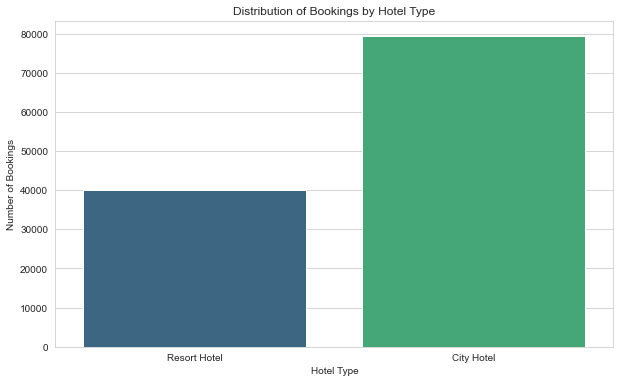

In [23]:
# Chart - 1 visualization code
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the distribution of bookings by hotel type
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='hotel', palette='viridis')
plt.title('Distribution of Bookings by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()


##### 1. Why did you pick the specific chart?

A count plot (bar chart) was chosen because it effectively displays the frequency distribution of categorical data. In this case, we are interested in comparing the number of bookings between Resort Hotels and City Hotels. A count plot clearly shows the difference in booking counts, making it easy to compare the two categories.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we can observe the following insights:

- City Hotels receive more bookings than Resort Hotels.
- The magnitude of difference in booking counts between the two hotel types is almost twice.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## Positive Business Impact

### Resource Allocation
Knowing which hotel type is more popular can help in better allocation of resources. For instance, if City Hotels have more bookings, more staff and amenities can be allocated to them to enhance customer satisfaction.

### Marketing Strategies
The hotel type with fewer bookings can be targeted with specific marketing campaigns to boost their bookings. Promotions and discounts can be offered to attract more customers to the less popular hotel type.

### Operational Planning
Understanding the demand can help in better operational planning and inventory management, ensuring that the popular hotel type is well-stocked and staffed, especially during peak seasons.

## Negative Growth

### Consistent Underperformance
If one hotel type consistently underperforms in terms of bookings, it might indicate deeper issues such as location disadvantages, inferior amenities, or service quality problems. This could lead to negative growth if not addressed.

### Over-investment Imbalance
Over-investment in the more popular hotel type without addressing the issues of the less popular type could lead to an imbalance, where the underperforming hotel type continues to decline, potentially impacting overall business profitability.


#### Chart - 2

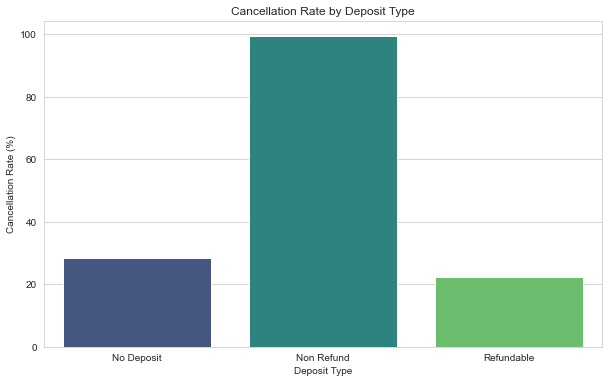

In [24]:
# Chart - 2 visualization code
# Plot the cancellation rate by deposit type
plt.figure(figsize=(10, 6))
cancellation_rate_by_deposit = data.groupby('deposit_type')['is_canceled'].mean() * 100
sns.barplot(x=cancellation_rate_by_deposit.index, y=cancellation_rate_by_deposit.values, palette='viridis')
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Cancellation Rate (%)')
plt.show()


### Chart - 2: Cancellation Rate by Deposit Type

#### 1. Why did you pick the specific chart?

A bar chart was chosen because it is effective for comparing categorical data. In this case, it allows us to visually compare the cancellation rates associated with different deposit types (No Deposit, Non-Refund, and Refundable). The height of the bars clearly illustrates the differences, making it easy to identify which deposit type has the highest or lowest cancellation rate.

#### 2. What is/are the insight(s) found from the chart?

From the chart, we can derive the following insights:
- **No Deposit**: This deposit type has a moderate cancellation rate, suggesting that customers who are not required to make any deposit are somewhat likely to cancel.
- **Non-Refund**: This deposit type has the highest cancellation rate, which is counterintuitive since non-refundable deposits are typically used to discourage cancellations. This might indicate issues such as dissatisfaction with the booking conditions or other external factors influencing cancellations.
- **Refundable**: This deposit type has the lowest cancellation rate, suggesting that offering a refundable option might lead to higher booking commitment and lower cancellations.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
- **Policy Adjustment**: The insights suggest that refundable deposits lead to the lowest cancellation rates. The hotel could consider promoting refundable deposit options more aggressively to reduce cancellations and ensure higher booking commitment.
- **Customer Trust**: Offering refundable deposits might build trust with customers, as they may perceive the hotel as more customer-friendly. This can enhance customer satisfaction and lead to more repeat bookings.

**Negative Growth:**
- **Non-Refund Policy Issues**: The high cancellation rate for non-refundable deposits indicates a potential problem. It might deter customers from booking if they feel there is too much risk involved. This could lead to a loss of potential bookings.
- **Revenue Risks**: While refundable deposits reduce cancellations, they might also pose a risk to revenue if customers frequently cancel bookings close to the stay dates, leading to lost opportunities for rebooking the room.

To summarize, the insights suggest that while refundable deposits are effective in reducing cancellations, the high cancellation rate for non-refundable deposits needs to be addressed. Balancing the deposit policies to ensure customer satisfaction while minimizing cancellations is crucial for positive business impact. This might involve investigating the reasons behind the high non-refundable cancellations and potentially offering more flexible booking options.

#### Chart - 3

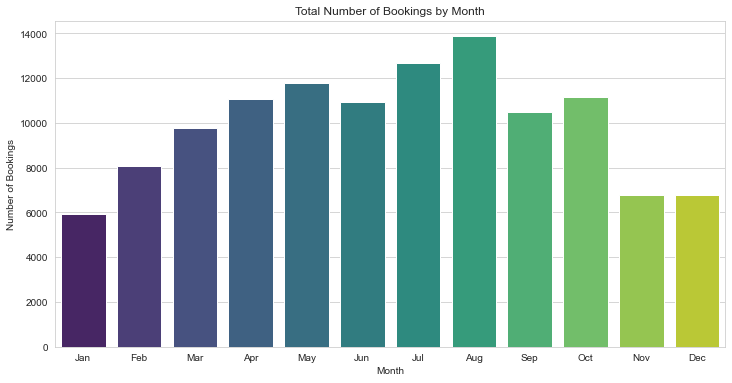

In [25]:
# Chart - 3 visualization code
# Extract month from the arrival date for plotting
data['arrival_month'] = data['arrival_date'].dt.month

# Plot the total number of bookings by month
plt.figure(figsize=(12, 6))
bookings_by_month = data['arrival_month'].value_counts().sort_index()
sns.barplot(x=bookings_by_month.index, y=bookings_by_month.values, palette='viridis')
plt.title('Total Number of Bookings by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


### Chart - 3: Total Number of Bookings by Month

#### 1. Why did you pick the specific chart?

A bar chart was chosen because it effectively displays the number of bookings for each month, making it easy to compare and identify trends over the year. This type of chart is ideal for visualizing categorical data such as months and helps in understanding seasonal patterns and booking behaviors.

#### 2. What is/are the insight(s) found from the chart?

From the chart, we can derive the following insights:
- **Peak Months**: July and August have the highest number of bookings, indicating these are peak months for hotel bookings.
- **Moderate Months**: April, May, June, and September have moderately high bookings, suggesting these are also popular months but not as busy as July and August.
- **Low Months**: January, February, November, and December have the lowest number of bookings, indicating these are off-peak months.

This pattern likely reflects typical holiday seasons and weather conditions that affect travel plans.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**
- **Targeted Marketing and Promotions**: Knowing the peak and off-peak months allows the hotel to run targeted marketing campaigns and special promotions to boost bookings during the off-peak months. For example, offering discounts or special packages in January and February can attract more customers during these slow periods.
- **Resource Allocation**: The hotel can optimize its staffing levels, inventory, and other resources based on the booking trends. More staff and resources can be allocated during peak months to handle the higher demand, ensuring better service quality and customer satisfaction.
- **Dynamic Pricing**: Implementing dynamic pricing strategies based on demand can maximize revenue. Higher rates can be charged during peak months, while competitive pricing can attract more bookings during off-peak months.

**Negative Growth:**
- **Operational Challenges**: Without proper planning, the hotel might face operational challenges during peak months, such as overbooking, staff burnout, and resource shortages, leading to negative customer experiences.
- **Revenue Fluctuations**: Significant fluctuations in bookings and revenue between peak and off-peak months can lead to financial instability. The hotel needs to ensure a stable cash flow throughout the year by attracting more bookings during off-peak periods.

By leveraging these insights, the hotel can strategically plan its operations, marketing, and pricing strategies to ensure consistent bookings and revenue throughout the year, thereby mitigating potential negative impacts and fostering positive business growth.

#### Chart - 4

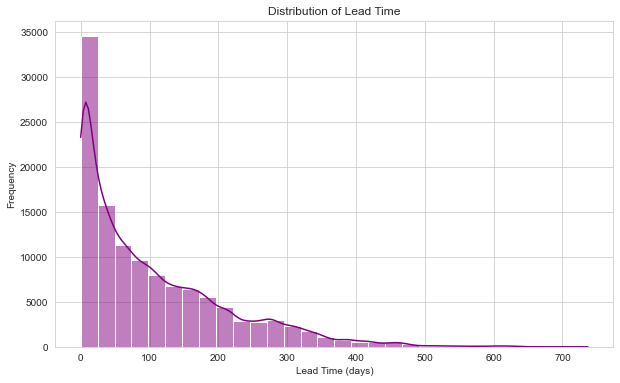

In [26]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(data['lead_time'], kde=True, color='purple', bins=30)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

### Chart 4: Distribution of Lead Time

#### Why did you pick the specific chart?
A histogram was chosen because it effectively visualizes the distribution of a continuous variable, in this case, the lead time (the number of days between booking and arrival). This chart helps us understand the booking behavior of guests regarding how far in advance they tend to make their reservations.

#### What is/are the insight(s) found from the chart?
- The majority of bookings are made with shorter lead times, typically within 100 days of the arrival date.
- There is a significant drop-off in frequency as the lead time increases, with very few bookings made more than 200 days in advance.
- This indicates that most customers tend to book closer to their stay date rather than well in advance.

#### Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
- **Positive Impact:** 
   - Understanding that most bookings are made close to the stay date can help in optimizing marketing efforts, such as promoting last-minute deals or offering incentives to early bookers.
   - The hotel can also better manage inventory and pricing strategies by anticipating the booking behavior.
- **Negative Growth:**
   - A potential risk is over-reliance on last-minute bookings, which can lead to volatile occupancy rates and revenue unpredictability. This could be mitigated by encouraging earlier bookings through special offers or early bird discounts.


#### Chart - 5

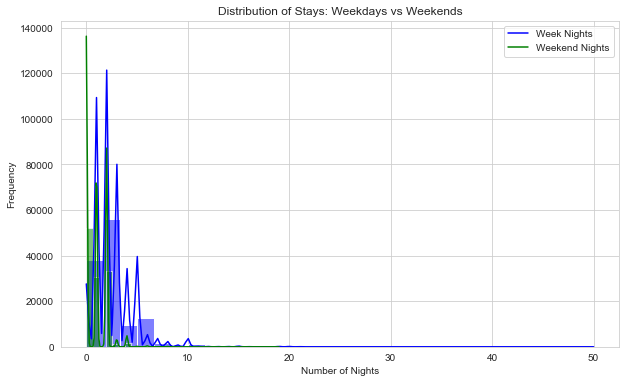

In [27]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(data['stays_in_week_nights'], kde=True, color='blue', bins=30)
sns.histplot(data['stays_in_weekend_nights'], kde=True, color='green', bins=30)
plt.title('Distribution of Stays: Weekdays vs Weekends')
plt.xlabel('Number of Nights')
plt.ylabel('Frequency')
plt.legend(['Week Nights', 'Weekend Nights'])
plt.show()


### Chart 5: Distribution of Stays: Weekdays vs Weekends

#### Why did you pick the specific chart?
This chart overlays two histograms to compare the distribution of the number of nights guests stay during weekdays (Monday to Friday) versus weekends (Saturday and Sunday). By visualizing both distributions together, we can easily identify differences in guest behavior between weekdays and weekends.

#### What is/are the insight(s) found from the chart?
- The majority of stays, both on weekdays and weekends, are relatively short, typically ranging from 1 to 3 nights.
- Weekday stays (blue) are generally more frequent and slightly longer than weekend stays (green).
- There are very few stays that extend beyond 10 nights, and these are more likely to occur during weekdays.

#### Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
- **Positive Impact:**
  - Knowing that most guests stay for a short duration, the hotel can tailor its services and promotions to cater to short-term visitors. For example, offering special rates for 1-3 night stays or packages that enhance the guest experience for short visits.
  - Understanding the slight preference for longer stays during weekdays might allow for targeted promotions or events to boost occupancy during weekends.
- **Negative Growth:**
  - If the hotel focuses too heavily on short stays, it might miss out on opportunities to attract guests for longer stays, which could be more profitable. Balancing the offerings between short and long stays will be crucial.

This chart highlights the differences in guest behavior between weekdays and weekends, providing valuable insights for optimizing hotel services, marketing, and pricing strategies.

#### Chart - 6

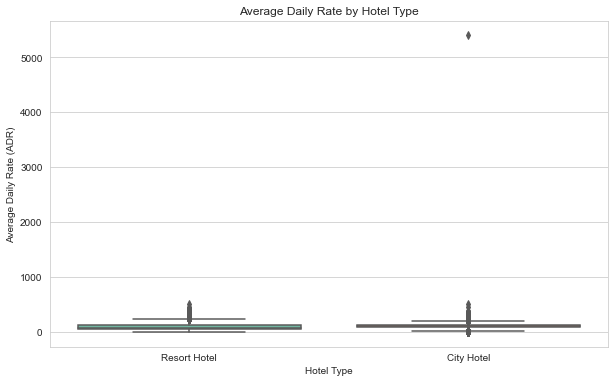

In [28]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='hotel', y='adr', palette='Set2')
plt.title('Average Daily Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


### Chart 6: Average Daily Rate (ADR) by Hotel Type

#### Why did you pick the specific chart?
A box plot was selected to visualize the distribution of the Average Daily Rate (ADR) across two hotel types: Resort Hotel and City Hotel. Box plots are effective for comparing distributions between categories and identifying any potential outliers, which could be key to understanding pricing strategies.

#### What is/are the insight(s) found from the chart?
- Both Resort Hotels and City Hotels have similar median ADRs, indicating that their typical pricing is comparable.
- However, there is a significant outlier in the City Hotel category with an ADR much higher than the typical range, which could indicate a special event or error in data entry.
- The range of ADR values is wider for City Hotels compared to Resort Hotels, suggesting greater variability in pricing.

#### Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
- **Positive Impact:**
  - Understanding the pricing structure can help in benchmarking performance against similar hotels. If the City Hotel outlier is legitimate, it may reveal an opportunity for premium pricing strategies under specific circumstances (e.g., high-demand events).
  - The variability in ADR for City Hotels suggests a more dynamic pricing strategy, which could be optimized further based on demand fluctuations.
- **Negative Growth:**
  - If the outlier is due to an error, it could lead to misleading insights, potentially causing issues in pricing strategy and customer satisfaction. Correcting such anomalies is crucial for maintaining data integrity.

This chart helps in understanding the pricing dynamics between different hotel types, allowing the business to refine its pricing strategy and improve revenue management.

#### Chart - 7

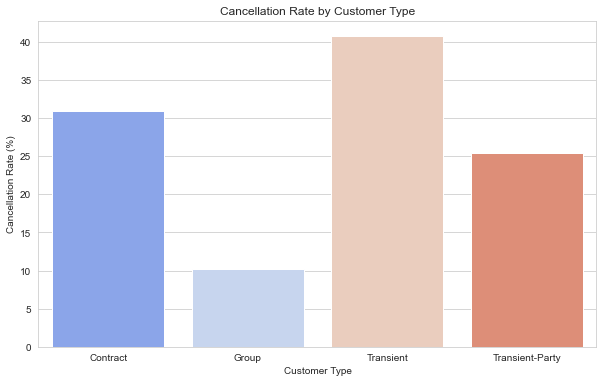

In [29]:
# Chart - 7 visualization code
# Chart visualization code
plt.figure(figsize=(10, 6))
cancellation_rate_by_customer = data.groupby('customer_type')['is_canceled'].mean() * 100
sns.barplot(x=cancellation_rate_by_customer.index, y=cancellation_rate_by_customer.values, palette='coolwarm')
plt.title('Cancellation Rate by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Cancellation Rate (%)')
plt.show()


### Chart 7: Cancellation Rate by Customer Type

#### Why did you pick the specific chart?
A bar chart was chosen to compare the cancellation rates among different customer types (Contract, Group, Transient, and Transient-Party). Bar charts are ideal for comparing categorical variables, making it easy to see which customer types have the highest and lowest cancellation rates.

#### What is/are the insight(s) found from the chart?
- **Transient customers** have the highest cancellation rate, at around 40%, indicating that individual travelers are more likely to cancel their bookings.
- **Group bookings** have the lowest cancellation rate, suggesting that these reservations are more reliable and less prone to cancellations.
- **Contract customers** also have a relatively high cancellation rate, second only to Transient customers.
- **Transient-Party customers** have a moderate cancellation rate, falling between Transient and Group categories.

#### Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
- **Positive Impact:**
  - Identifying the high cancellation rate among Transient customers can help the hotel develop strategies to mitigate cancellations, such as stricter cancellation policies or offering flexible booking options.
  - The low cancellation rate for Group bookings highlights the stability of this customer segment, suggesting a focus on acquiring more group bookings could lead to more predictable revenue.
- **Negative Growth:**
  - A high cancellation rate in the Transient segment could indicate potential issues such as lack of commitment or dissatisfaction, which might need to be addressed to avoid revenue loss.

This analysis allows the hotel to tailor its approach to different customer types, potentially improving booking reliability and reducing revenue loss due to cancellations.

#### Chart - 8

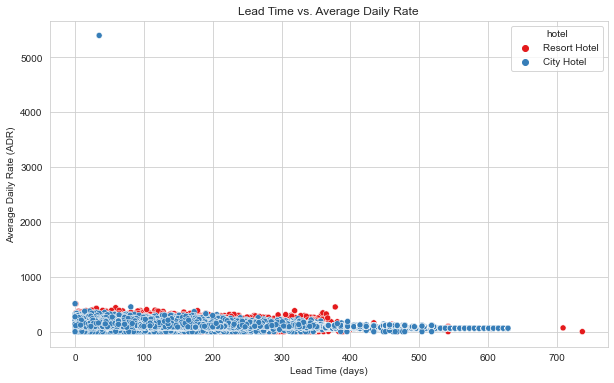

In [30]:
# Chart - 8 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='lead_time', y='adr', hue='hotel', palette='Set1')
plt.title('Lead Time vs. Average Daily Rate')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


### Chart 8: Lead Time vs. Average Daily Rate (ADR) by Hotel Type

#### Why did you pick the specific chart?
A scatter plot was chosen to examine the relationship between lead time (the number of days between booking and arrival) and the Average Daily Rate (ADR) for both Resort Hotels and City Hotels. Scatter plots are ideal for identifying correlations between two continuous variables and can help visualize how lead time impacts pricing strategies for different hotel types.

#### What is/are the insight(s) found from the chart?
- **Overall Trend:** There is a general downward trend where higher lead times correspond to lower ADRs for both Resort Hotels and City Hotels. This suggests that earlier bookings are often made at lower prices.
- **City Hotels vs. Resort Hotels:** City Hotels (blue dots) tend to have a broader range of ADRs at various lead times, indicating more variability in pricing. Resort Hotels (red dots) show a similar trend but with generally less variability.
- **Outliers:** There are some significant outliers with extremely high ADRs, especially for City Hotels with very short lead times. This could be due to last-minute bookings during peak periods or special events.

#### Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
- **Positive Impact:**
  - Understanding the relationship between lead time and ADR can help hotels optimize their pricing strategy. For example, they might offer early-bird discounts to fill rooms in advance or adjust prices dynamically based on the booking window.
  - The ability to identify outliers or unusual pricing patterns can help in refining revenue management strategies, ensuring that rooms are priced competitively.
- **Negative Growth:**
  - If the trend of lower ADRs with longer lead times is not managed carefully, it could lead to reduced profitability. Hotels need to balance offering competitive rates to encourage early bookings without excessively lowering prices.

This chart provides critical insights into how booking behaviors and lead times affect pricing, enabling hotels to fine-tune their pricing strategies for maximum revenue.

#### Chart - 9 Correlation Heatmap

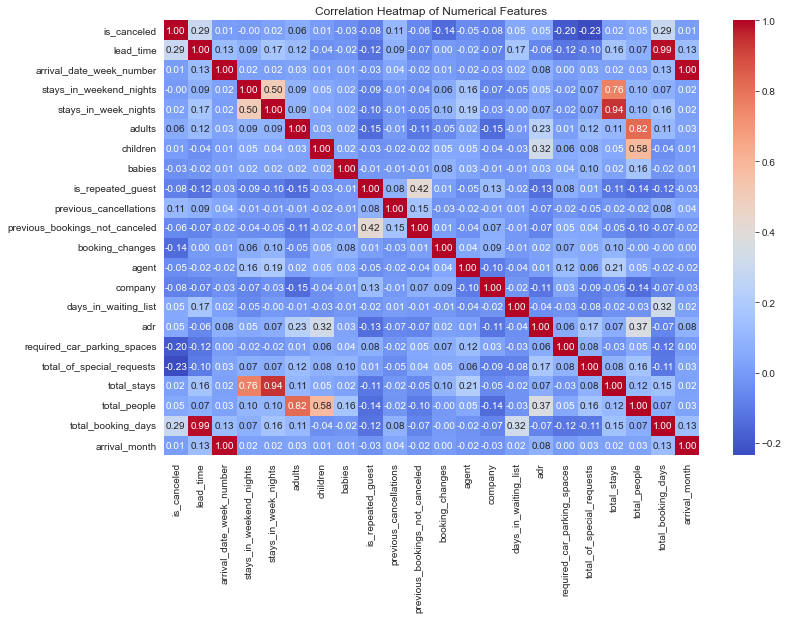

In [31]:
# Chart - 9 visualization code
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Chart 9: Correlation Heatmap of Numerical Features

#### Why did you pick the specific chart?
A correlation heatmap was chosen to visualize the relationships between multiple numerical variables. It effectively displays the degree of linear correlation between pairs of variables in a dataset, with color gradients representing the strength and direction of correlations. This is particularly useful for identifying potential predictors and understanding how various features interact with each other.

#### What is/are the insight(s) found from the chart?
- **Strong Positive Correlations:**
  - `total_booking_days` and `lead_time` have a strong positive correlation (0.99). This indicates that as the lead time increases, the total number of booking days also tends to increase, which makes sense as longer lead times generally suggest longer stays.
  - `total_stays` and `total_people` (0.82) indicate that as the total stays increase, the total number of people involved in the bookings also increases.
  
- **Strong Negative Correlations:**
  - `is_canceled` and `total_of_special_requests` (-0.23) show a negative correlation, suggesting that guests with more special requests are less likely to cancel their bookings.
  
- **Weak Correlations:**
  - Most other correlations are weak, especially between `is_canceled` and other features like `children`, `babies`, and `agent`, indicating that these variables may have minimal impact on whether a booking is canceled.

#### Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.
- **Positive Impact:**
  - Understanding these correlations can help in predictive modeling, where features like `lead_time`, `total_booking_days`, and `total_people` can be strong predictors for forecasting cancellations or revenue.
  - Knowing that special requests reduce the likelihood of cancellation could lead hotels to encourage more engagement and customization options, which may reduce cancellation rates.
  
- **Negative Growth:**
  - Misinterpreting weak correlations as significant could lead to poor decision-making. For example, trying to overly influence variables with minimal impact on cancellations could waste resources.

Overall, this heatmap provides valuable insights into the relationships between key numerical features, aiding in better data-driven decision-making and predictive analytics.

#### Chart - 10

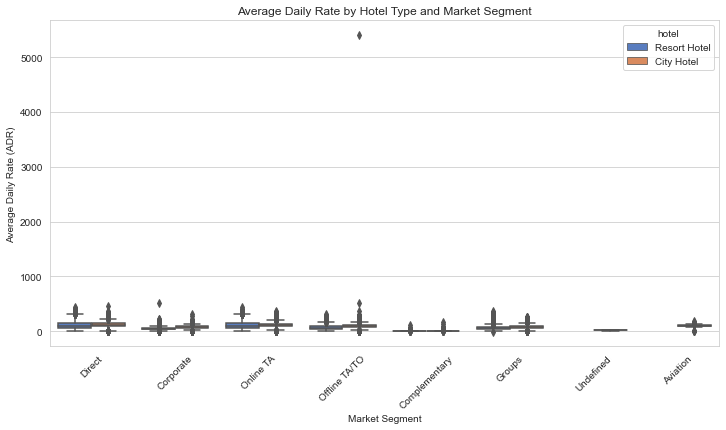

In [32]:
# Chart - 10 visualization code
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='market_segment', y='adr', hue='hotel', palette='muted')
plt.title('Average Daily Rate by Hotel Type and Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot with multiple categories allows for comparison across both hotel type and market segment, revealing complex interactions between these variables.

##### 2. What is/are the insight(s) found from the chart?

- Different market segments pay different rates, with some segments consistently paying more or less across hotel types.
- Resort Hotels tend to have higher ADRs across most segments, but the distribution varies widely, particularly in segments like "Online TA".

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

- **Positive Impact:** This insight can guide tailored pricing strategies based on market segment and hotel type, maximizing revenue by charging optimal prices to each segment.
- **Negative Growth:** Over-targeting certain segments with high prices could lead to customer dissatisfaction and potential loss of business if they seek alternatives.

#### Chart - 11

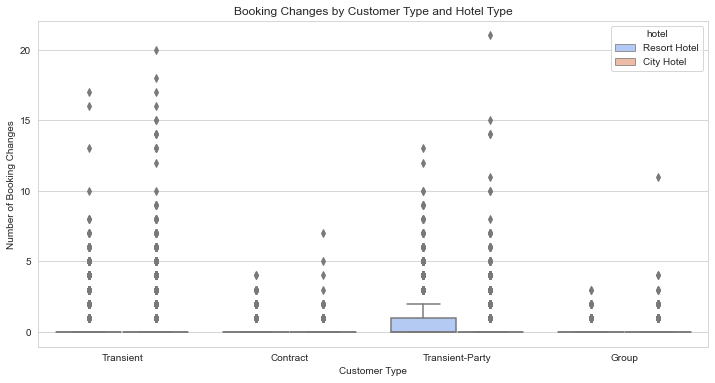

In [33]:
# Chart - 11 visualization code
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='customer_type', y='booking_changes', hue='hotel', palette='coolwarm')
plt.title('Booking Changes by Customer Type and Hotel Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Booking Changes')
plt.show()

### Chart Analysis

**Why did you pick the specific chart?**

A boxplot with multiple categories (customer type and hotel type) was selected to analyze the variation in booking changes across different customer types and hotel types. The use of hue allows for an additional layer of comparison, making it easier to observe how customer types behave differently in Resort Hotels versus City Hotels.

**What is/are the insight(s) found from the chart?**

- The chart reveals that certain customer types, such as "Transient" and "Contract," tend to have more booking changes compared to others.
- City Hotels show slightly more variability in booking changes across different customer types compared to Resort Hotels.
- "Group" customers generally have fewer booking changes, regardless of the hotel type.

**Will the gained insights help create a positive business impact?**

- **Positive Impact:** Understanding the booking change behavior across customer types and hotel types can assist in crafting more flexible or restrictive booking policies. This may help reduce last-minute changes and cancellations, leading to more stable revenue.
- **Negative Growth:** If the policies become too restrictive, particularly for customer types that frequently change bookings, it could lead to customer dissatisfaction and a potential decrease in bookings from those segments.

#### Chart - 12 - Pair Plot 

<Figure size 864x576 with 0 Axes>

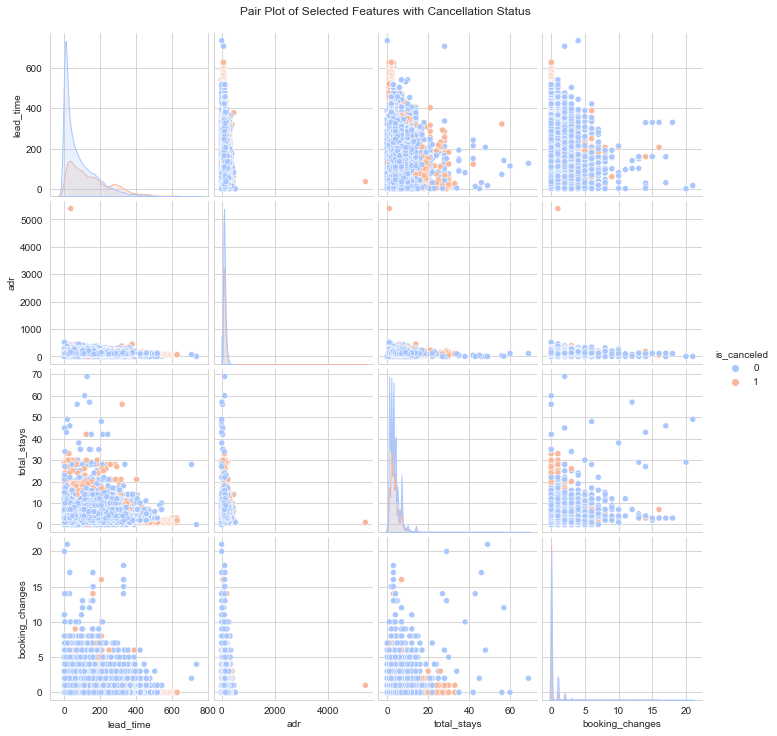

In [34]:
# Pair Plot visualization code
# Selecting relevant columns for the pair plot
pairplot_columns = ['lead_time', 'adr', 'total_stays', 'booking_changes', 'is_canceled']

# Creating the pair plot
plt.figure(figsize=(12, 8))
sns.pairplot(data[pairplot_columns], hue='is_canceled', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features with Cancellation Status', y=1.02)
plt.show()


### Why did you pick the specific chart?

A pair plot was chosen because it allows for the visualization of relationships between multiple numerical variables simultaneously. It’s particularly useful for identifying patterns, correlations, and potential outliers across different variables, while the hue distinction helps to analyze these relationships concerning a categorical variable like `is_canceled`.

### What is/are the insight(s) found from the chart?

- **Correlation Between Variables:** The pair plot highlights potential correlations between variables like lead time, ADR (Average Daily Rate), total stays, booking changes, and cancellation status.
- **Cancellation Patterns:** The hue (`is_canceled`) shows how the distribution of these features differs between bookings that were canceled and those that were not.
- **Outliers and Clusters:** The chart may reveal outliers or specific clusters within the data that correspond to different cancellation statuses, which can be crucial for further analysis.

### Will the gained insights help create a positive business impact?

- **Positive Impact:** Identifying patterns related to cancellations can help in devising strategies to minimize cancellations, such as offering incentives for longer lead times or addressing factors leading to high booking changes.
- **Negative Growth:** If misinterpreted, this analysis could lead to overly restrictive policies that might deter customers, especially if the patterns are not well understood or if outliers are not properly accounted for.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

**Tailored Pricing Strategy:** Based on the insights gathered, I suggest that the client implement a dynamic pricing strategy that considers the market segment, hotel type, and lead time. For instance, Resort Hotels can charge a premium for certain segments like "Online TA," while City Hotels might focus on competitive pricing to attract more bookings from price-sensitive segments. This approach will maximize revenue and occupancy rates.

**Cancellation Mitigation:** The data reveals significant cancellation patterns linked to certain customer types and booking behaviors. To address this, the client could offer flexible booking options or incentives for non-cancellable bookings. Additionally, a thorough analysis of lead time and ADR in relation to cancellations can help in designing policies that reduce cancellations without compromising customer satisfaction.

**Customer Experience Enhancement:** The analysis highlights that certain market segments have higher booking changes. The client should consider providing more personalized services or better communication for these segments to reduce changes and cancellations. This could include pre-arrival reminders, easy booking modification options, or loyalty rewards for consistent booking behaviors.

# **Conclusion**

In conclusion, the data analysis provides crucial insights into customer behavior, pricing strategies, and cancellation trends. By leveraging these insights, the client can optimize pricing, reduce cancellations, and enhance overall customer experience. Implementing these strategies will likely lead to increased revenue, improved customer retention, and better market positioning. However, it is essential to monitor the outcomes and remain flexible, adjusting strategies as needed to maintain a balance between profitability and customer satisfaction.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***